In [8]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14516172123983831903
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11320098816
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9682774988979700649
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
 xla_global_id: 416903419]

In [9]:
%matplotlib inline
import cv2 #　opencvのインポート
import matplotlib.pyplot as plt # matplotlib(描画用)

print(cv2.__version__)

4.1.2


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


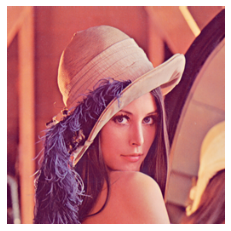

In [11]:
img=cv2.imread("/content/drive/MyDrive/Cascade_sample/Lena.png")

show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(show_img) #表示

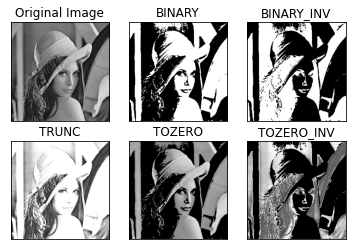

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/content/drive/MyDrive/Cascade_sample/Lena.png",0)

#ある閾値で二値化
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

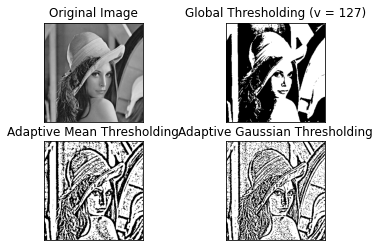

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/content/drive/MyDrive/Cascade_sample/Lena.png",0)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

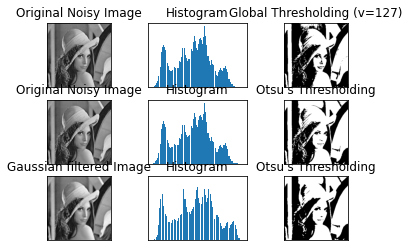

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/content/drive/MyDrive/Cascade_sample/Lena.png",0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

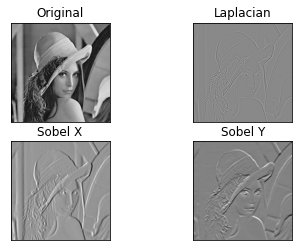

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/content/drive/MyDrive/Cascade_sample/Lena.png",0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

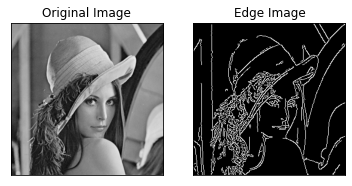

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("/content/drive/MyDrive/Cascade_sample/Lena.png",0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

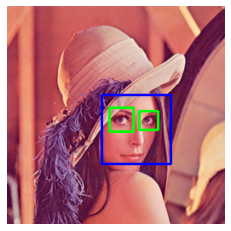

In [17]:
import cv2
import numpy as np

# カスケード型分類器のパスを指定
face_cascade_path = '/content/drive/MyDrive/Cascade_sample/haarcascade_frontalface_default.xml'
eye_cascade_path = '/content/drive/MyDrive/Cascade_sample/haarcascade_eye.xml'

face_cascade = cv2.CascadeClassifier(face_cascade_path)
eye_cascade = cv2.CascadeClassifier(eye_cascade_path)

# 適用する画像を読み込みグレースケールに変換
img=cv2.imread("/content/drive/MyDrive/Cascade_sample/Lena.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 顔を検出
faces = face_cascade.detectMultiScale(img_gray)

# 顔領域の描画
for x, y, w, h in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    # 顔領域の定義
    face = img[y: y + h, x: x + w]
    face_gray = img_gray[y: y + h, x: x + w]
    # 顔領域に対して瞳を検出
    eyes = eye_cascade.detectMultiScale(face_gray)
    # 瞳領域の描画
    for (ex, ey, ew, eh) in eyes:
      cv2.rectangle(face, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
        
# 画像をRGB変換して表示
show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   
plt.axis('off')
plt.imshow(show_img) #表示

In [18]:
import platform
print("python " + platform.python_version())

python 3.7.13
